# Método de Punto Fijo
El **método de iteración de punto fijo** es un método abierto para encontrar la raíz de una ecuación. Se basa en reorganizar la función $f(x) = 0$ en una forma equivalente $x = g(x)$.
 
 La idea es comenzar con una estimación inicial $x_{0}$ y luego generar una secuencia de aproximaciones usando la fórmula recursiva:
 
 $$x_{i+1} = g(x_i)$$
 
 La iteración continúa hasta que la diferencia entre $x_{i+1}$ y $x_i$ sea lo suficientemente pequeña, según una tolerancia especificada.
 
 ### Condición de Convergencia
 Una condición suficiente para la convergencia del método es que la derivada de $g(x)$ sea menor que 1 en valor absoluto en un intervalo que contiene la raíz:
 
 $$|g'(x)| < 1$$
 
 Si esta condición no se cumple, el método puede diverger.

## Ejemplo 1: Convergencia
iniciando la busqueda en $x=1$ encuantre la solución de la siguiente ecuación:
$$x = 2 \sin(\sqrt{x})$$
$$g(x) = 2 \sin(\sqrt{x})$$

### Prueba de convergencia 

In [1]:
from sympy import diff, symbols
import sympy as sp
x = symbols('x')

In [2]:
g = 2 * sp.sin(sp.sqrt(x))
der_x = diff(g,x)

In [3]:
der_x.subs(x,1).evalf()

0.540302305868140

$$|g'(x)| < 1$$
por tanto cumple

In [4]:
from mnspy import PuntoFijo
import numpy as np
# se habilita los gráficos interactivos de la biblioteca Matplotlib para habilitar el zoom.
%matplotlib widget

Definimos la función $g(x)$ para la iteración. En este caso, $g(x) = 2 \sin(\sqrt{x})$.

In [5]:
def g(x):
    return 2 * np.sin(np.sqrt(x))

In [6]:
# "Instanciamos la clase PuntoFijo con un valor inicial de 1 y una tolerancia de 0.001. 
pf = PuntoFijo(g, 1, 0.001)

In [7]:
# Personalizamos el formato de la tabla para una mejor visualización.
pf.formato_tabla('E_a','0.5%')
pf.formato_tabla('f','0.5f')

In [8]:
# Generamos la tabla de iteraciones:
pf.generar_tabla()

Iteración,$x_{i}$,$f\left(x_{i}\right)$,$\varepsilon_{a}$
1,1.0000000000,1.68294,nan%
2,1.6829419696,1.92566,40.58024%
3,1.9256554185,1.96656,12.60420%
4,1.9665619557,1.97169,2.08010%
5,1.9716900452,1.97230,0.26009%
6,1.9722994510,1.97237,0.03090%
7,1.9723713808,1.97238,0.00365%
8,1.9723798640,1.97238,0.00043%


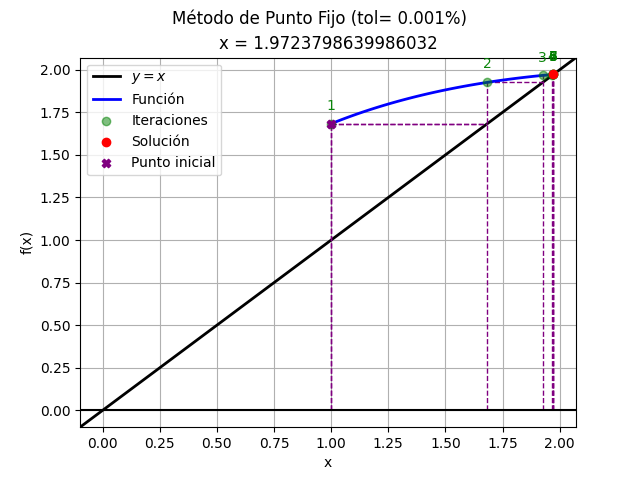

In [9]:
# Graficamos el proceso de convergencia. La gráfica muestra la función g(x) y la recta y=x. La solución es la intersección de ambas.
pf.graficar()

In [10]:
# Finalmente, obtenemos la solución encontrada:
pf.solucion()

$x$:,1.97238
$f(x)$:,1.97238
$\varepsilon_{a}[\%]$:,0.0004301
Número de iteraciones:,8


## Ejemplo 2: Divergencia
Ahora, probemos con una función que no cumple la condición de convergencia. Sea $g(x) = x^2 - 1$.
 
La derivada es $g'(x) = 2x$. Si comenzamos con $x_0 = 0.5$, tenemos $|g'(0.5)| = 1$, y para valores mayores de $x$, la derivada será mayor que 1. Por lo tanto, esperamos que el método diverja.
 

In [11]:
def f(x):
    return x**2 -1

In [12]:
# Instanciamos PuntoFijo con un máximo de 7 iteraciones para observar la divergencia.
pf = PuntoFijo(f, 0.5, 0.01,max_iter=7)

In [13]:
#Tabla de iteraciones:
pf.generar_tabla()

Iteración,$x_{i}$,$f\left(x_{i}\right)$,$\varepsilon_{a}$
1,0.5000000000,-0.75000000,nan%
2,-0.7500000000,-0.43750000,166.66667%
3,-0.4375000000,-0.80859375,71.42857%
4,-0.8085937500,-0.34617615,45.89372%
5,-0.3461761475,-0.88016207,133.57870%
6,-0.8801620749,-0.22531472,60.66905%
7,-0.2253147219,-0.94923328,290.63674%


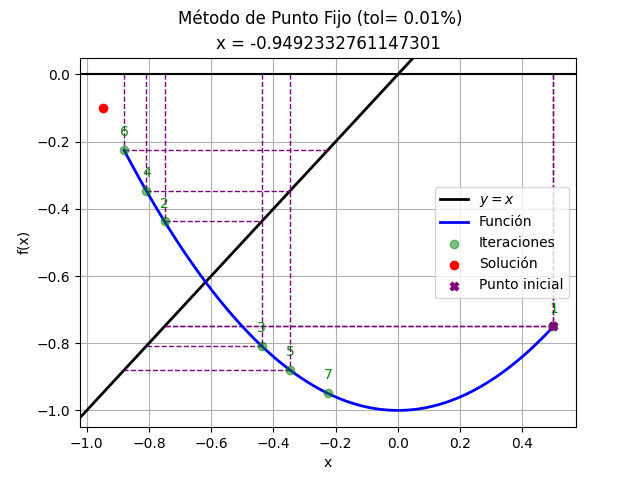

In [14]:
# La gráfica muestra cómo las iteraciones se alejan de la solución en lugar de acercarse.
pf.graficar()

In [15]:
# El método no converge a una solución.
pf.solucion()

***** No converge a una solución en el máximo de iteraciones definidas *****


 ___
 ## Ejemplo 6.1 (Chapra, 5ª ed.)
  **Problema:**

Use una iteración simple de punto fijo para localizar la raíz de $f(x)= e^{-x} – x$. COn un $x_{0}=0$, y ejecutelo para $10$ iteraciones.

 Primero, reorganizamos la ecuación $f(x)=0$ a la forma $x=g(x)$:
 
 $$e^{-x} - x = 0 \implies x = e^{-x}$$
 
 Por lo tanto, nuestra función de iteración es $g(x) = e^{-x}$.

In [16]:
def f(x):
    return np.exp(-x)

In [17]:
# Instanciamos PuntoFijo con la función g(x) y el valor inicial x0=0.
pf = PuntoFijo(f,0,max_iter=50)
# Personalizamos el formato de la tabla:
pf.formato_tabla('E_a','0.5%')
pf.formato_tabla('f','0.10f')
# Tabla de iteraciones:
pf.generar_tabla()

Iteración,$x_{i}$,$f\left(x_{i}\right)$,$\varepsilon_{a}$
1,0.0000000000,1.0000000000,nan%
2,1.0000000000,0.3678794412,100.00000%
3,0.3678794412,0.6922006276,171.82818%
4,0.6922006276,0.5004735006,46.85364%
5,0.5004735006,0.6062435351,38.30915%
6,0.6062435351,0.5453957860,17.44679%
7,0.5453957860,0.5796123355,11.15662%
8,0.5796123355,0.5601154614,5.90335%
9,0.5601154614,0.5711431151,3.48087%
10,0.5711431151,0.5648793474,1.93080%


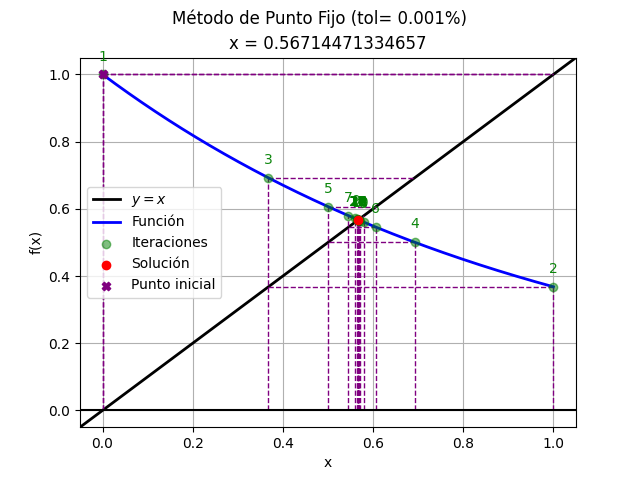

In [18]:
# Gráfica del proceso de convergencia:
pf.graficar(n_puntos=1000)

In [19]:
# Solución encontrada:
pf.solucion()

$x$:,0.567145
$f(x)$:,0.567142
$\varepsilon_{a}[\%]$:,0.000693278
Número de iteraciones:,24
